In [57]:
# 데이터 가져오기 > 텍스트 형식으로 추출 > 바이너리 형식으로 추출
import requests as rq
import urllib
url = "http://api.aoikujira.com/time/get.php"

# 텍스트
print(rq.get(url).text, '\n')

# 바이너리

print(rq.get(url).content)
print(urllib.request.urlopen(url).read())

2023/05/03 16:11:34 

b'2023/05/03 16:11:34'
b'2023/05/03 16:11:34'


b'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\xa9\x94\xec\x9d\xb8\xec\x97\x90\xec\x84\x9c \xeb\x8b\xa4\xec\x96\x91\xed\x95\x9c \xec\xa0\x95\xeb\xb3\xb4\xec\x99\x80 \xec\x9c\xa0\xec\x9a\xa9\xed\x95\x9c \xec\xbb\xa8\xed\x85\x90\xec\xb8\xa0\xeb\xa5\xbc \xeb\xa7\x8c\xeb\x82\x98 \xeb\xb3\xb4\xec\x84\xb8\xec\x9a\x94"/> <meta property="og:title" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2
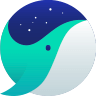
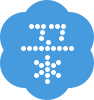

In [58]:
# url = 'http://naver.com'을 텍스트와 바이너리로 가져오세요.

url = 'http://naver.com'

# 텍스트
rq.get(url).text, '\n'

# 바이너리
rq.get(url).content
urllib.request.urlopen(url).read()

In [59]:
# requests로 요청 시 데이터를 실어 보내는 경우 데이터를 딕셔러니 형태로 만들어 보내는 방식

# url = 'http://naver.com'r을 'http://www.naver.com/?key1=value1&key2=value2'로 만드세요.
url = 'http://naver.com'
res = rq.get(url, params = {'key1':'value1', 'key2':'value2'})
print(res.url)                        

https://www.naver.com/?key1=value1&key2=value2


In [60]:
# post 요청 시 데이터가 url에 포함되지 않고 header의 body에 포함됨
# body 데이터 추가 시 data를 사용

url = 'http://naver.com'
res = rq.post(url, data = {'key1':'value1', 'key2':'value2'})
print(res.url)

https://www.naver.com/


In [131]:
from bs4 import BeautifulSoup

url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100'

headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"}

req = rq.get(url, headers=headers)
bs = BeautifulSoup(req.content, 'html.parser')
print(bs.prettify())

<!DOCTYPE HTML>
<html lang="ko">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta contents="always" name="referrer"/>
  <meta content="600" http-equiv="refresh">
   <meta content="width=1106" name="viewport">
    <meta content="정치 : 네이버 뉴스" property="og:title"/>
    <meta content="website" property="og:type"/>
    <meta content="https://news.naver.com/main/main.naver?mode=LSD&amp;mid=shm&amp;sid1=100" property="og:url"/>
    <meta content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_800x420_20221201.png" property="og:image">
     <meta content="국회, 행정, 국방, 외교 등 정치 분야 뉴스 제공" property="og:description"/>
     <meta content="네이버" property="og:article:author">
      <meta content="summary" name="twitter:card"/>
      <meta content="정치 : 네이버 뉴스" name="twitter:title"/>
      <meta content="네이버 뉴스" name="twitter:site"/>
      <meta content="네이버 뉴스" name="twitter:creator"/>
      <meta content="https://ssl.pstatic.net/static.n

In [ ]:
# 기본 태그를 사용해서 해당하는 첫번째 텍스트와 전체 텍스트를 출력
#1
bs.find('a').text

te = bs.find_all('a')
for i in te:
    print(i.text)

#2
bs.find('span', class_='tx').text

te = bs.findAll('span', class_='tx')
for i in te:
    print(i.text)

#3
bs.find('div')

te = bs.findAll('div')
for i in te:
    print(i.text)

#4
te = bs.find_all('span', {'class':'blind','class':"tx"})
for i in te:
    print(i.text)
    
# 5.
bs.select_one('div#u_skip a span').text

# 6.
te = bs.select('div#u_skip a span')
for i in te:
    print(i.text)

In [ ]:
# 기본 태그를 사용해서 해당하는 첫 번째 텍스트와 전체 텍스트를 출력

# a li dt span p div 등

import re

print(' '.join(re.findall('[^\s]+', bs.find('div').text)))

for i in bs.find_all('div'):
    print(' '.join(re.findall('[^\s]+', i.text)))

In [ ]:
print(' '.join(re.findall('[^\s]+', bs.find('div', {'class':'cluster_text'}).text)))

for i in bs.find_all('div', {'class':'cluster_text'}):
    print(' '.join(re.findall('[^\s]+', i.text)))

In [218]:
# list_iterator는 한 번에 한 요소만 가지고 올 수 있기에 인덱싱 불가하다(하나니까)
# for문 쓰거나 list, next(함수 쓸 것)

# a = bs.find('div', {'class':'cluster_text'}).children[0]
texts = bs.find('div', {'class':'cluster_text'}).children

# for text in texts:
#     print(text.text)

# list(texts)[3].text


In [229]:
next(texts)

StopIteration: 

In [61]:
# div태그를 모두 가져와서 문자와 숫자만 스페이스로 연결해서 출력하세요

for i in bs.find_all('div'):
    print(' '.join(re.findall('[^\W]+', i.text)))

메인 메뉴로 바로가기 본문으로 바로가기 검색 NAVER 뉴스 TV연예 스포츠 날씨 프리미엄 언론사별 정치 선택됨 경제 사회 생활 문화 IT 과학 세계 랭킹 신문보기 오피니언 TV 팩트체크 전체 언론사 뉴스스탠드 라이브러리 05 03 수 전체 언론사 뉴스스탠드 라이브러리 기사목록 정치 대통령실 국회 정당 북한 행정 국방 외교 정치일반 안내헤드라인 뉴스 헤드라인 뉴스와 각 기사묶음 타이틀은 기사 내용을 기반으로 자동 추출됩니다 닫기 김진표 박광온에 낭만원대 박사부 되길 부드러운 카리스마 필요 金 지지자 넘어 국민 전체 바라봐야 朴 확장성 보여줘야 성공할 수 있어 김진표 국회의장이 3일 오전 국회의장실에서 박광온 더불어민주당 신임 원내대 매일경제 연합뉴스 김의장 박광온에 선거제 개편 상반기엔 마무리했으면 머니S 김진표 집무실 찾은 박광온에 선거법 빨리 마무리하자 전자신문 김진표 의장 박광온 원내대표에 상반기내 선거제 개편 매듭 촉구 10개의 관련뉴스 더보기 與김성태 대통령실 누구도 아직 공천에 대한 입장 가질 수 없어 기사내용 요약 태영호 먼저 판단하고 말하지 말고 동료의원들 얘기 들어야 여야 원내대표 간 이해관계가 살아난 뒤 영수회담도 이뤄질 것 서울 뉴김 뉴시스 중앙일보 태영호 녹취록 논란 진중권 박근혜는 이걸로 실형 받았다 서울신문 태영호 공천 녹취록 논란 이진복 사실무근 YTN 尹 박광온 먼저 만나나 박광온 이재명 먼저 뉴스라이더 70개의 관련뉴스 더보기 尹 한미동맹 영역 계속 확장될 것 취임 1주년 소회도 종합 윤석열 대통령은 2일 이번 정상회담을 통해 한미동맹은 가치동맹 의 주춧돌 위에 안보동맹 산업동맹 과학기술동맹 문화동맹 정보동맹이라는 다섯 개의 노컷뉴스 파이낸셜뉴스 尹 세계 최강국과 70년 동맹 고마운 게 있으면 고맙다 말해야 아시아경제 안철수 과학기술이 평화 한미 교류하면 g5 먼 미래 아니다 디지털타임스 尹 한미 핵협의그룹 나토 NPG보다 실효적 野 비판 반박 27개의 관련뉴스 더보기 돈 봉투 의혹 민주당 윤관석 이성만 의원 자진 탈당 결정 돈 

#### 과제2_0503,
url = 'https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=100' 사이트에서id가 'footer'인 한글만 출력하세요.

In [285]:
from bs4 import BeautifulSoup
import re
import requests as rq

url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100'

headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"}

req = rq.get(url, headers=headers)
bs = BeautifulSoup(req.content, 'html.parser')

# footer는 한 개 밖에 없음
print(' '.join(re.findall('[가-힣]+', bs.find(id='footer').text)),'\n')    

# findall쓰면 for문 돌려야 함
for i in bs.find_all(id='footer'):
    print(' '.join(re.findall('[가-힣]+', i.text)))

이용약관 서비스 안내 기사배열 원칙 책임자 유봉석 청소년 보호 책임자 이희만 개인정보처리방침 책임의 한계와 법적고지 뉴스 고객센터 본 콘텐츠의 저작권은 제공처 또는 네이버에 있으며 이를 무단 이용하는 경우 저작권법 등에 따라 법적책임을 질 수 있습니다 

이용약관 서비스 안내 기사배열 원칙 책임자 유봉석 청소년 보호 책임자 이희만 개인정보처리방침 책임의 한계와 법적고지 뉴스 고객센터 본 콘텐츠의 저작권은 제공처 또는 네이버에 있으며 이를 무단 이용하는 경우 저작권법 등에 따라 법적책임을 질 수 있습니다


#### 과제3_0503,

url = 'https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=100' 사이트에서p태그가 있는 데이터를 5개만 출력하세요

In [72]:
from bs4 import BeautifulSoup
import requests as rq

url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100'

headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"}

req = rq.get(url, headers=headers)
bs = BeautifulSoup(req.content, 'html.parser')

for i in bs.find_all('p', limit=2):
    print(i.text, '\n')

AiRS추천으로 구성된 뉴스를 제공합니다. 

오후 3시~오후 4시까지 집계한 결과입니다. 



#### 과제4_0503.
url = 'https://news.daum.net/politics#1' 사이트에서 '정치'를 출력하세요.

In [7]:
import requests as rq
from bs4 import BeautifulSoup

url = 'https://news.daum.net/politics#1'

headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"}

req = rq.get(url, headers=headers)
bs = BeautifulSoup(req.text, 'html.parser')

bs.select_one('#gnbContent > div > ul > li.on > a > span').text

'정치'

In [18]:
bs.select_one('div#u_skip>a>span').text

'메인 메뉴로 바로가기'

In [19]:
bs.find('div', id='header').find('a').text

'메인 메뉴로 바로가기'

In [30]:
# https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100'
# class_='cluster_text'에 있는 모든 한글 text 10개를 출력하세요.

import re

for i in bs.find_all(class_ ='cluster_text', limit=10):
    print(' '.join(re.findall('[가-힣]+', i.text)),'\n')

민주 기시다 방한에 과거사 사과부터 받아야 더불어민주당은 오는 일로 예정된 기시다 일본 총리 방한과 관련해 애매모호 한 말장난이 아닌 우리 국민 모두가 인정할 수 있는 과거사에 대한 사과부터 받아야 한다고 주장했습니다 민주당 권칠승 수석대변 

머니투데이 총리 방한 앞두고 우려 쏟은 호갱외교 용납 안 돼 

뉴시스 민주 기시다 방한 앞두고 외교 맹공 호갱외교 용납 못해 종합 

오마이뉴스 민주당 기시다 방한 얼마나 퍼줄지 걱정 과거사 사죄 받아내야 

이진복 태영호 녹취록 당무개입 의혹에 그런 얘기 나눈 적 없어 이진복 대통령실 정무수석은 일 태영호 국민의힘 최고위원에게 공천문제를 거론하며 한 일 관계 관련 정부에 유리한 발언을 해 달라고 요청했다는 의혹에 대해 국민일보 

중앙일보 이진복 태영호에 공천 거론 녹취 논란 이 수석 공천 당에서 하는 것 

박광온 먼저 만나나 박광온 이재명 먼저 뉴스라이더 

주간조선 진중권 공천권이 대통령실에 있다고 인식하는 게 핵심 

바이든 허수아비 화형식 워싱턴 선언 반발 지속 북한 청년 학생들이 복수결의모임 을 열고 한미 정상을 겨냥한 허수아비 화형식 을 진행한 것으로 확인됐다 북한의 조선중앙통신은 일 악의 제국 미 동아일보 

연합뉴스 북 워싱턴선언 두렵나 막말에 화형식 민감 반응 속내는 



#### 과제5_0503.
url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100'에서 뉴스 제목 10개를 가져오세요(사이트의 뉴스와 일치)


In [45]:

from selenium import webdriver
from selenium.webdriver.common.by import By

url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100'

driver = webdriver.Chrome('C:/tool/chromedriver.exe')

driver.get('https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=102')

headlines = driver.find_elements(By.XPATH, '//*[@id="main_content"]/div/div/div/div/div/ul/li/div/a')

for headline in headlines[:10]:
    print(headline.text)

C:\Users\h\AppData\Local\Temp\ipykernel_15548\4069496788.py:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C:/tool/chromedriver.exe')


'미성년자까지' 해외플랫폼에 음란물 급증…경찰 "엄정 대응"
경찰 국수본, 'SNS 유료 불법 성영상물' 엄정수사 지시
경찰, 유료구독형 SNS '불법 야동' 집중 단속 나선다
불법 음란물 유통창구 ‘구독형 SNS'… 경찰, 특별단속 착수
“윤석열이 노동자를 죽였다”…민주노총, 대전·충남서 정부 규탄
노동절 분신한 건설노조 간부 치료중 숨져
민노총 제주본부 "건설노조 간부 분신 사망, 尹 직접 사과해야"
노동절 분신한 건설노조 간부 입원 치료 중 숨져
장성군, 신생아 양육 지원금 인상…최대 1000만원 지급
장성군 신생아 양육비 지원 2배 인상…넷째는 1000만원


#### 과제6_0503.
상기에서 출력된 데이터를 news.txt 파일로 저장하세요.

In [48]:
from selenium import webdriver
from selenium.webdriver.common.by import By

with open('news.txt', 'w') as f:
    f.write('')

url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100'

driver = webdriver.Chrome('C:/tool/chromedriver.exe')

driver.get('https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=102')

headlines = driver.find_elements(By.XPATH, '//*[@id="main_content"]/div/div/div/div/div/ul/li/div/a')
    
for headline in headlines[:10]:
    print(headline.text, file=open('news.txt', 'a', encoding='utf-8'))

C:\Users\h\AppData\Local\Temp\ipykernel_15548\3589725264.py:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C:/tool/chromedriver.exe')


#### 과제7_0503.
네이버 등 자주 사용하는 웹페이지에서 가치있다고 생각할 수 있는 데이터를 가져와서 활용할 수 있는 형태로 출력하세요.(최소 1000개 이상)

In [10]:
import requests as rq
from bs4 import BeautifulSoup

url = 'https://finance.naver.com/research/company_list.naver'

headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"}

req = rq.get(url, headers=headers)
bs = BeautifulSoup(req.text, 'html.parser')

len(bs.find_all('td'))

230

In [ ]:
# 프로토 타입

import re

headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"}
req = rq.get(url, headers=headers)


  
for i in range(1,2):
    url = 'https://finance.naver.com/research/company_list.naver?&page=' + str(i)
    req = rq.get(url, headers=headers)
    bs = BeautifulSoup(req.text, 'html.parser')
    for j in bs.find('table').find_all('td'):
        match = re.findall('[^\W]+',j.text)
        if match:
            print(match)

    
print(total_count/5)      

In [209]:
# 네이버 증권 리서치 - 종목분석 리포트 (BeautifulSoup 사용)

import re
import requests as rq
from bs4 import BeautifulSoup

url = 'https://finance.naver.com/research/company_list.naver?&page=1'
headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"}

req = rq.get(url, headers=headers)

count = 0
total_count = 0

print('<종목명 / 분석내용제목 / 분석증권사 / 작성일 / 조회수 순임>')
print('='*90, '\n')

for i in range(1, 36):
    url = 'https://finance.naver.com/research/company_list.naver?&page=' + str(i)    # 36페이지 URL 루프 할당
    req = rq.get(url, headers=headers)
    bs = BeautifulSoup(req.text, 'html.parser')
    for j in bs.find('table').find_all('td'):    # table 태그에 tb태그만 추출
        match = re.findall('[^\W]+', j.text)
        if match:                          # 깔끔한 출력 위해 td태그에 공백 출력은 제거하기 위한 match 작업
            print(' '.join(match))
            count += 1                          # 데이터 개수 보기 위한 count 루프
            if count % 5 == 0:
                print()
   
print(f'총 {int(count/5)} 개의 종목 분석 데이터임', '\n')

<종목명 / 분석내용제목 / 분석증권사 / 작성일 / 조회수 순임>

기업은행
선제적 충당금 적립으로 기대치 하회
DS투자증권
23 05 03
412

에코프로비엠
비싼 데는 이유가 있지만
DS투자증권
23 05 03
1956

아모레퍼시픽
1Q23 Review 반등은 2분기부터
교보증권
23 05 03
459

BGF리테일
1Q23 Review 봄을 맞이하며
교보증권
23 05 03
193

하이브
모든 아티스트 성장세가 기대 이상
교보증권
23 05 03
684

주성엔지니어링
업황 대비 양호한 1Q23 실적
교보증권
23 05 03
444

카카오페이
금융서비스 매출 회복
교보증권
23 05 03
208

HK이노엔
1Q23 Re 쉬어가는 상반기 Q A 포함
교보증권
23 05 03
199

아모레G
2Q23 중국 소비 회복 방한 관광객에 주목
하나증권
23 05 03
246

F F
1Q23Re 확대되는 중국 사업 실적 모멘텀
하나증권
23 05 03
211

BGF리테일
1Q23Re 견조한 실적 돋보이는 편의점 사업
하나증권
23 05 03
133

아모레퍼시픽
2Q23 편안한 기저 중국 소비 회복에 주목
하나증권
23 05 03
276

HK이노엔
1Q23 Re 예상된 부진 방향성은 유지
하나증권
23 05 03
159

에치에프알
악순환의 연속 하지만 매도보단 매수가 유리
하나증권
23 05 03
454

금호석유
실적 추정치 하향의 마침표를 찍는 서프라이
하나증권
23 05 03
384

하이브
최소한 미국 걸그룹 볼 때까지는 묻어두자
하나증권
23 05 03
713

솔루엠
숫자로 증명한 ESL 성장성과 수익성
이베스트증권
23 05 03
518

하이브
말했잔아요 끄떡없다고
이베스트증권
23 05 03
494

롯데칠성
1Q23 Review 새로 점유율 6 6
이베스트증권
23 05 03
176

아모레퍼시픽
1Q23 Review 수익성 기조로 간다
이베스트증권
23 05 03
206

F F
1Q23 Review 돋보이는 중국 직진출 전략


두산퓨얼셀
이번 분기 실적이 연내 저점
하나증권
23 04 28
1424

HD현대중공업
계속 나아지는 모습
하나증권
23 04 28
459

LG전자
무엇을 더 보여줘야 할까
하나증권
23 04 28
892

하나금융지주
비이자이익과 분기배당이 돋보였던 깜짝 실적
하나증권
23 04 28
624

한화솔루션
기다렸던 AMPC 손익 반영 그리고 프로젝트
이베스트증권
23 04 28
4968

나이스디앤비
ESG 평가 부문 강화될 듯
이베스트증권
23 04 28
336

기업은행
건전성 부담 지속
이베스트증권
23 04 28
470

LG전자
가전 업계 Top Tier 의 위상
이베스트증권
23 04 28
590

LG생활건강
1Q23 Review 중국 회복 시점이 중요
이베스트증권
23 04 28
393

풍산
1Q23 Review 방산 서프라이즈
이베스트증권
23 04 28
513

POSCO홀딩스
1Q23 Review 주가는 이차전지 소재를 따라간
이베스트증권
23 04 28
2537

한화에어로스페이스
1Q23 Review 말이 필요없는 완벽한 실적
이베스트증권
23 04 28
1491

하나금융지주
양호한 표면이익과 적극적 주주환원
이베스트증권
23 04 28
402

신한지주
녹록치 않은 환경
이베스트증권
23 04 28
383

KB금융
핵심이익 둔화와 비용부담 확대
이베스트증권
23 04 28
442

자이에스앤디
1Q23 Review 사랑해요 LG
이베스트증권
23 04 28
632

GS건설
1Q23 Review 연결회사 호실적
이베스트증권
23 04 28
465

대우건설
1Q23 Review 양질의 해외가 이끈 마진개선
이베스트증권
23 04 28
287

삼성엔지니어링
1Q23 Review 비화공이 이끈 서프라이즈
이베스트증권
23 04 28
489

삼성전자
2Q23 분기 실적 저점 예상
이베스트증권
23 04 28
2114

한화솔루션
1Q23 Review 태양광 종합 솔루션 기업으로서
한화투자증권
23 04 28
2489

S Oil

현대차
와 너무 좋은데
하나증권
23 04 26
4250

솔루스첨단소재
1Q23 Review 아쉬운 1분기 2분기부터 회복
한화투자증권
23 04 26
864

솔루스첨단소재
조금씩 나아지고 있다
대신증권
23 04 26
697

천보
큰 그림을 보자
대신증권
23 04 26
2216

현대차
1분기 실적에 두근 2분기 실적에 설렘
대신증권
23 04 26
1871

HMM
운임 추세 하락 국면에서 등락을 거듭할 것으
대신증권
23 04 26
2503

현대차
상고하저의 흐름 예상
미래에셋증권
23 04 26
1973

삼성바이오로직스
장기적 성장 모멘텀은 여전히 유효
하이투자증권
23 04 26
1116

현대차
1Q23 Review 웅장하다
하이투자증권
23 04 26
993

OCI
이제는 신설법인에 주목해야 할 때
미래에셋증권
23 04 26
2222

대웅제약
리스크 부각 모멘텀 부재하나 과도한 주가 하
미래에셋증권
23 04 26
781

삼성카드
예견된 실적 부진
미래에셋증권
23 04 26
506

솔루스첨단소재
전지박 수익성 개선 본격화
키움증권
23 04 26
724

현대차
1Q23 Review 경이로운 실적
유진투자증권
23 04 26
817

골프존
1Q23 Review 라운드 수 최고치 갱신
유진투자증권
23 04 26
782

솔루스첨단소재
1Q23 Review
유진투자증권
23 04 26
450

현대위아
1Q23 Review 더딘 회복세 vs 증설 모멘텀
하이투자증권
23 04 26
926

솔루스첨단소재
하반기에 웃을 예정
신한투자증권
23 04 26
570

한화시스템
거대한 잠재력 실적은 거들 뿐
신한투자증권
23 04 26
1605

현대위아
개선 속도가 더딘 이유들
신한투자증권
23 04 26
772

현대차
수익성이 넘친다
신한투자증권
23 04 26
899

현대차
우려를 실적으로 잠재우다
유안타증권
23 04 26
584

알테오젠
아이들에게 선물해야 할 주식
유진투자증권
23 04 26
2553

OCI
선방한 

삼성전기
분기 실적 바닥 통과
하나증권
23 04 14
3921

세아베스틸지주
1분기 무난한 실적 전망 성장동력 확보 긍정
하나증권
23 04 14
1422

롯데정밀화학
확연히 높아진 이익 체력
대신증권
23 04 14
2588

KH바텍
콥데이 후기
대신증권
23 04 14
2103

이마트
연중 1 분기 실적 저점
대신증권
23 04 14
2137

고려아연
Slow Start 예상
대신증권
23 04 14
2726

CJ ENM
방향은 맞으나 시간이 필요
대신증권
23 04 14
4803

데브시스터즈
퀀텀 점프
신한투자증권
23 04 14
2797

강원랜드
2019년 vs 2023F의 다른 점
신한투자증권
23 04 14
3359

지노믹트리
신의료기술평가 유예 확정의 의미
SK증권
23 04 14
2105

켐트로닉스
IT OLED는 Hybrid OLED
신한투자증권
23 04 14
1856

삼성에스디에스
IT서비스 GOOD
신한투자증권
23 04 14
2073

현대일렉트릭
수주 목표 상향이 의미하는 세가지
신한투자증권
23 04 14
1702

현대건설기계
신흥 북미 호조에 유럽 회복
신한투자증권
23 04 14
1182

엘오티베큠
태양광과 반도체 2023년 사상 최대 실적 전
키움증권
23 04 14
3447

EDGC
유전체 분석으로 건강하고 오래 살자
한국IR협의회
23 04 14
1294

테고사이언스
해외진출을 준비하는 첨단바이오의약품 전문
한국IR협의회
23 04 14
1036

롯데정보통신
탄탄한 본업 신사업 모멘텀 밸류에이션 매
한국IR협의회
23 04 14
1497

콘텐트리중앙
유미의 랜덤박스
미래에셋증권
23 04 14
1411

CJ ENM
유미의 기다림
미래에셋증권
23 04 14
1438

스튜디오드래곤
유미의 탑픽
미래에셋증권
23 04 14
2549

한미약품
본업의 고성장과 마진 개선 CMO는 덤
미래에셋증권
23 04 14
1555

유한양행
1Q23 Pre 양호한 실적과 R D 기대감
DS투자증권
23 0

카카오뱅크
순조로운 여신 성장
대신증권
23 04 05
5595

삼성엔지니어링
수주는 슬로우 스타트 2분기부터 가속 전망
대신증권
23 04 05
1575

현대차
Winter is Not Coming
대신증권
23 04 05
3162

효성첨단소재
첨단 으로 체질 개선 중
대신증권
23 04 05
3846

우리금융지주
NIM 하락에도 견조한 이자이익
대신증권
23 04 05
2894

KB금융
뒷심을 발휘하는 구간
대신증권
23 04 05
2098

하나금융지주
무난한 실적 전망
대신증권
23 04 05
1623

신한지주
녹록치 않은 1 분기
대신증권
23 04 05
2192

현대글로비스
주가 절대적 저평가 영역
대신증권
23 04 05
3294

티앤엘
또 한번의 고성장을 맞이할 때
SK증권
23 04 05
1945

롯데칠성
어려울 때 하는 성장이 진짜다
SK증권
23 04 05
1410

KH바텍
2023년에도 폴더블을 주목하는 이유
SK증권
23 04 05
1869

HL만도
1Q23 Preview 여전한 코스트 부담
유진투자증권
23 04 05
964

인터로조
안정감 뒤에 숨겨진 잠재력
신한투자증권
23 04 05
1461

솔루엠
추가 업사이드의 가능성들
하이투자증권
23 04 05
3542

현대일렉트릭
북미는 충전 중
신한투자증권
23 04 05
1747

고려아연
안정화와 변화의 균형
유안타증권
23 04 05
1451

원텍
관심을 더 올리지오
유안타증권
23 04 05
2068

디어유
모멘텀이 반영되기 시작했다
키움증권
23 04 05
1745

인크로스
티딜 성장에 주목하자
키움증권
23 04 05
940

제주반도체
사물인터넷과 엣지디바이스용 메모리의 겨울
한국IR협의회
23 04 05
1135

화승엔터프라이즈
코로나로 잃어버린 3 년 벗어나는 올해
대신증권
23 04 04
2219

POSCO홀딩스
지금은 리튬의 시간
대신증권
23 04 04
19898

한세실업
끝이 보이는 부진
대신증권
23 04 04
1899

영원

In [306]:
# 네이버 증권 리서치 - 종목분석 리포트 (selenium 사용)
# 페이지를 35를 클릭해서 데이터를 가져오는 동적 행위를 반복하기에 시간이 굉장히 오래 걸림

from selenium import webdriver
from selenium.webdriver.common.by import By

path = 'c:/tool/chromedriver.exe'

driver = webdriver.Chrome(path)

count=0

print('<종목명 / 분석내용제목 / 분석증권사 / 작성일 / 조회수 순임>')
print('='*90, '\n')

for i in range(1,35):
    url = f'https://finance.naver.com/research/company_list.naver?&page={i}' # 데이터 1,000개를 위한 페이지 수 루프
    driver.get(url)                                              # 웹페이지 로딩 루프
    texts = driver.find_elements(By.CLASS_NAME, 'type_1')        # 페이지마다 공통적인 종목분석 테이블 태크
    for text in texts:
        for td in text.find_elements(By.TAG_NAME, 'td'):         # 테이블 안의 td태그만 뽑기
            match = re.findall('[^\W]+', td.text)    
            if match:                            # 깔끔한 출력 위해 td태그에 공백 출력은 제거하기 위한 작업
                print(td.text)
                count += 1                                       # 데이터 개수 보기 위한 count 루프
                if count % 5 == 0:
                    print()        
              
print(f'총 {int(count/5)} 개의 종목 분석 데이터임', '\n')    

C:\Users\h\AppData\Local\Temp\ipykernel_10028\2085972343.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path)


기업은행
선제적 충당금 적립으로 기대치 하회
DS투자증권
23.05.03
479

에코프로비엠
비싼 데는 이유가 있지만
DS투자증권
23.05.03
2252

아모레퍼시픽
1Q23 Review: 반등은 2분기부터
교보증권
23.05.03
522

BGF리테일
1Q23 Review: 봄을 맞이하며
교보증권
23.05.03
225

하이브
모든 아티스트 성장세가 기대 이상
교보증권
23.05.03
772

주성엔지니어링
업황 대비 양호한 1Q23 실적
교보증권
23.05.03
512

카카오페이
금융서비스 매출 회복
교보증권
23.05.03
237

HK이노엔
1Q23 Re. 쉬어가는 상반기(Q&A 포함)
교보증권
23.05.03
235

아모레G
2Q23 중국 소비 회복 + 방한 관광객에 주목
하나증권
23.05.03
285

F&F
1Q23Re: 확대되는 중국 사업 실적 모멘텀
하나증권
23.05.03
241

BGF리테일
1Q23Re: 견조한 실적, 돋보이는 편의점 사업 ..
하나증권
23.05.03
155

아모레퍼시픽
2Q23 편안한 기저, 중국 소비 회복에 주목
하나증권
23.05.03
304

HK이노엔
1Q23 Re: 예상된 부진, 방향성은 유지
하나증권
23.05.03
178

에치에프알
악순환의 연속, 하지만 매도보단 매수가 유리..
하나증권
23.05.03
512

금호석유
실적 추정치 하향의 마침표를 찍는 서프라이..
하나증권
23.05.03
443

하이브
최소한 미국 걸그룹 볼 때까지는 묻어두자
하나증권
23.05.03
808

솔루엠
숫자로 증명한 ESL 성장성과 수익성
이베스트증권
23.05.03
606

하이브
말했잔아요, 끄떡없다고
이베스트증권
23.05.03
550

롯데칠성
1Q23 Review: 새로 점유율 6.6%
이베스트증권
23.05.03
205

아모레퍼시픽
1Q23 Review: 수익성 기조로 간다
이베스트증권
23.05.03
232

F&F
1Q23 Review: 돋보이는 중국 직진출 전략
이베스트증권
23.05.0

In [297]:
driver.current_url        

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=112.0.5615.138)
Stacktrace:
Backtrace:
	GetHandleVerifier [0x010ADCE3+50899]
	(No symbol) [0x0103E111]
	(No symbol) [0x00F45588]
	(No symbol) [0x00F2D333]
	(No symbol) [0x00F8F4DB]
	(No symbol) [0x00F9DB33]
	(No symbol) [0x00F8B6F6]
	(No symbol) [0x00F67708]
	(No symbol) [0x00F6886D]
	GetHandleVerifier [0x01313EAE+2566302]
	GetHandleVerifier [0x013492B1+2784417]
	GetHandleVerifier [0x0134327C+2759788]
	GetHandleVerifier [0x01145740+672048]
	(No symbol) [0x01048872]
	(No symbol) [0x010441C8]
	(No symbol) [0x010442AB]
	(No symbol) [0x010371B7]
	BaseThreadInitThunk [0x76600099+25]
	RtlGetAppContainerNamedObjectPath [0x76EC7B6E+286]
	RtlGetAppContainerNamedObjectPath [0x76EC7B3E+238]


NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=112.0.5615.138)
Stacktrace:
Backtrace:
	GetHandleVerifier [0x010ADCE3+50899]
	(No symbol) [0x0103E111]
	(No symbol) [0x00F45588]
	(No symbol) [0x00F2D333]
	(No symbol) [0x00F8F4DB]
	(No symbol) [0x00F9DB33]
	(No symbol) [0x00F8B6F6]
	(No symbol) [0x00F67708]
	(No symbol) [0x00F6886D]
	GetHandleVerifier [0x01313EAE+2566302]
	GetHandleVerifier [0x013492B1+2784417]
	GetHandleVerifier [0x0134327C+2759788]
	GetHandleVerifier [0x01145740+672048]
	(No symbol) [0x01048872]
	(No symbol) [0x010441C8]
	(No symbol) [0x010442AB]
	(No symbol) [0x010371B7]
	BaseThreadInitThunk [0x76600099+25]
	RtlGetAppContainerNamedObjectPath [0x76EC7B6E+286]
	RtlGetAppContainerNamedObjectPath [0x76EC7B3E+238]


In [284]:

driver.find_elements(By.XPATH, '//*[@id="contentarea_left"]/div[3]/table[2]/tbody/tr/td[]/a')


[<selenium.webdriver.remote.webelement.WebElement (session="9f319a0d295adf8ae3127bfb90d2a3f6", element="5a739558-cee1-4fff-ab90-51a2f8d64138")>]

In [ ]:
//*[@id="contentarea_left"]/div[3]/table[2]/tbody/tr/td[1]/a

종목분석 리포트게시판
종목명 제목 증권사 첨부 작성일 조회수
기업은행
선제적 충당금 적립으로 기대치 하회 DS투자증권 23.05.03 432
에코프로비엠
비싼 데는 이유가 있지만 DS투자증권 23.05.03 2007
아모레퍼시픽
1Q23 Review: 반등은 2분기부터 교보증권 23.05.03 470
BGF리테일
1Q23 Review: 봄을 맞이하며 교보증권 23.05.03 200
하이브
모든 아티스트 성장세가 기대 이상 교보증권 23.05.03 699
주성엔지니어링
업황 대비 양호한 1Q23 실적 교보증권 23.05.03 453
카카오페이
금융서비스 매출 회복 교보증권 23.05.03 215
HK이노엔
1Q23 Re. 쉬어가는 상반기(Q&A 포함) 교보증권 23.05.03 210
아모레G
2Q23 중국 소비 회복 + 방한 관광객에 주목 하나증권 23.05.03 257
F&F
1Q23Re: 확대되는 중국 사업 실적 모멘텀 하나증권 23.05.03 218
BGF리테일
1Q23Re: 견조한 실적, 돋보이는 편의점 사업 .. 하나증권 23.05.03 138
아모레퍼시픽
2Q23 편안한 기저, 중국 소비 회복에 주목 하나증권 23.05.03 282
HK이노엔
1Q23 Re: 예상된 부진, 방향성은 유지 하나증권 23.05.03 165
에치에프알
악순환의 연속, 하지만 매도보단 매수가 유리.. 하나증권 23.05.03 463
금호석유
실적 추정치 하향의 마침표를 찍는 서프라이.. 하나증권 23.05.03 394
하이브
최소한 미국 걸그룹 볼 때까지는 묻어두자 하나증권 23.05.03 726
솔루엠
숫자로 증명한 ESL 성장성과 수익성 이베스트증권 23.05.03 532
하이브
말했잔아요, 끄떡없다고 이베스트증권 23.05.03 506
롯데칠성
1Q23 Review: 새로 점유율 6.6% 이베스트증권 23.05.03 183
아모레퍼시픽
1Q23 Review: 수익성 기조로 간다 이베스트증권 23.05.03 213
F&F
1Q23 Review: 돋보이는 중국 직진출 전략 